In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## Preparação dos Dados

In [2]:
desmatamento = pd.read_csv('prodes_desmatamento.csv', sep=';', encoding='latin1')

In [3]:
desmatamento.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730
3,1991,380,980,410,670,2840,3780,1110,420,440,11030
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786


In [4]:
#renomeando as colunas ano e amz legal
desmatamento = desmatamento.rename(columns={'Ano/Estados' : 'Ano', 'AMZ LEGAL' : 'Desmatamento'})

In [5]:
desmatamento = desmatamento[['Ano', 'Desmatamento']].dropna()

### Análise exploratório: serie temporal histíorica 

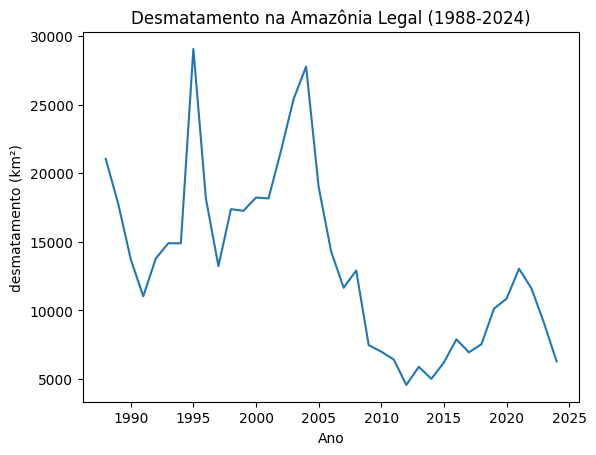

In [6]:
plt.figure()
plt.plot(desmatamento['Ano'], desmatamento['Desmatamento'])
plt.title("Desmatamento na Amazônia Legal (1988-2024)")
plt.xlabel("Ano")
plt.ylabel("desmatamento (km²)")
plt.show()

### Modelo preditivo: Regressão linear simples 

In [7]:
X = desmatamento['Ano'].values.reshape(-1, 1)
Y = desmatamento['Desmatamento'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Previsão para os próximos 6 anos (2025 - 2030)

In [8]:
proximos_anos = np.arange(2025, 2030).reshape(-1, 1)
predicao = model.predict(proximos_anos)

In [9]:
forecast_desmatamento = pd.DataFrame({
    'Ano': proximos_anos.flatten(),
    'Previsão desmatamento': predicao.flatten()
})

## Visualizando a previsão

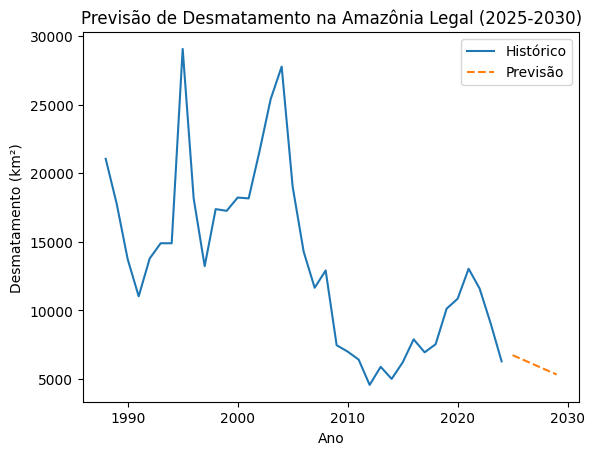

In [10]:
plt.figure()
plt.plot(desmatamento['Ano'], desmatamento['Desmatamento'], label='Histórico')
plt.plot(forecast_desmatamento['Ano'], forecast_desmatamento['Previsão desmatamento'], label='Previsão', linestyle='--')
plt.title("Previsão de Desmatamento na Amazônia Legal (2025-2030)")
plt.xlabel("Ano")
plt.ylabel("Desmatamento (km²)")
plt.legend()
plt.show()

In [11]:
print(forecast_desmatamento)

    Ano  Previsão desmatamento
0  2025            6740.500000
1  2026            6387.977240
2  2027            6035.454481
3  2028            5682.931721
4  2029            5330.408962
